# Data Exploratory Analysis
The following outlines the process I used to understand and analyze the dataset.

In [1]:
# The first step involves importing the libraries required for the process:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The graphics style selected is:
sns.reset_orig() 
plt.style.use('ggplot')

# Statistical packages used
from scipy.stats import shapiro, levene, chi2_contingency, f_oneway, kruskal

# Model packages used
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# To save the model
import pickle

In [2]:
# The following allows us to view all the columns of the dataset, regardless of its size:
pd.set_option('display.max_columns', None)

In [3]:
# Then the dataset is loaded as:
users = pd.read_csv("C://Users/jober/Data_Projects/classification_of_consumer_behaviour/Dataset/user_behaviour_dataset.csv", sep=";", )

## Step 1: Understanding the data
This step give us a general sense of the dataset: 

In [4]:
users.shape

(700, 11)

In [5]:
users.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [6]:
users.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [7]:
# Using the info() method, we can quickly identify the data type of each column and detect null values:"
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [8]:
# The describe() function provides basic statistics for the numerical variables in the dataset:
users.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


## Step 2: Data preparation
Now that I have a general understanding of the data, some evaluation is needed before proceeding with further analysis.

In [9]:
# Checking for duplicates:
users.duplicated().sum()

0

In [10]:
# Checking for null values 
users.isna().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [11]:
# Column names in our refined dataframe are converted to lowercase, and spaces are removed for consistency and usability:
users.columns = [name.lower() for name in users.columns]
users.columns = [name.replace(" ","_") for name in users.columns]

In [12]:
# The edited dataset is:
users.head()

,user_id,device_model,operating_system,app_usage_time_(min/day),screen_on_time_(hours/day),battery_drain_(mah/day),number_of_apps_installed,data_usage_(mb/day),age,gender,user_behavior_class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


The variables *app_usage_time_(min/day)* and *screen_on_time_(hours/day)* use different time units. To ensure consistency, screen_on_time will be transformed into a minutes-per-day ratio.

In [13]:
users['screen_on_time_(min/day)'] = users['screen_on_time_(hours/day)']*60

In [14]:
# Modify the type of target variable:
print(users['user_behavior_class'].unique())
users['user_behavior_class'] = users['user_behavior_class'].astype(object)
print('\n While those are numeric values, they are best treated as categories.')

[4 3 2 5 1]

 While those are numeric values, they are best treated as categories.


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     700 non-null    int64  
 1   device_model                700 non-null    object 
 2   operating_system            700 non-null    object 
 3   app_usage_time_(min/day)    700 non-null    int64  
 4   screen_on_time_(hours/day)  700 non-null    float64
 5   battery_drain_(mah/day)     700 non-null    int64  
 6   number_of_apps_installed    700 non-null    int64  
 7   data_usage_(mb/day)         700 non-null    int64  
 8   age                         700 non-null    int64  
 9   gender                      700 non-null    object 
 10  user_behavior_class         700 non-null    object 
 11  screen_on_time_(min/day)    700 non-null    float64
dtypes: float64(2), int64(6), object(4)
memory usage: 65.8+ KB


In [16]:
# The main statistics for out clean dataset are:
users.describe(include='all')

,user_id,device_model,operating_system,app_usage_time_(min/day),screen_on_time_(hours/day),battery_drain_(mah/day),number_of_apps_installed,data_usage_(mb/day),age,gender,user_behavior_class,screen_on_time_(min/day)
count,700.00000,700,700,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700,700.0,700.000000
unique,NaN,5,2,NaN,NaN,NaN,NaN,NaN,NaN,2,5.0,NaN
top,NaN,Xiaomi Mi 11,Android,NaN,NaN,NaN,NaN,NaN,NaN,Male,2.0,NaN
freq,NaN,146,554,NaN,NaN,NaN,NaN,NaN,NaN,364,146.0,NaN
mean,350.50000,NaN,NaN,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,NaN,NaN,316.362857
std,202.21688,NaN,NaN,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,NaN,NaN,184.115035
min,1.00000,NaN,NaN,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,NaN,NaN,60.000000
25%,175.75000,NaN,NaN,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,NaN,NaN,150.000000
50%,350.50000,NaN,NaN,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,NaN,NaN,294.000000
75%,525.25000,NaN,NaN,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,NaN,NaN,444.000000


There are no null values nor repeated rows. This is a clean dataset, then it doesn't requires wrangling. Analysis can now be performed directly.

In [17]:
users.columns

Index(['user_id', 'device_model', 'operating_system',
       'app_usage_time_(min/day)', 'screen_on_time_(hours/day)',
       'battery_drain_(mah/day)', 'number_of_apps_installed',
       'data_usage_(mb/day)', 'age', 'gender', 'user_behavior_class',
       'screen_on_time_(min/day)'],
      dtype='object')

In [18]:
# With these sets of variables:
categorical = ['user_id', 'device_model', 'operating_system',
               'age', 'gender', 'user_behavior_class']

numerical = ['app_usage_time_(min/day)', 'screen_on_time_(min/day)', 'battery_drain_(mah/day)', 
             'number_of_apps_installed', 'data_usage_(mb/day)']

The ranges of al Features are:

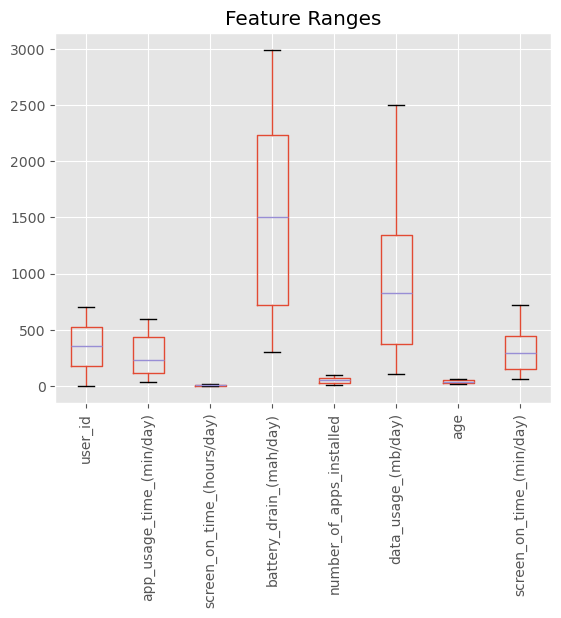

In [19]:
users.drop('user_behavior_class', axis=1).boxplot()
plt.title('Feature Ranges')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

## Step 3: Feature understanding

Now, it is important to understand how the variables behave:

### - Target variable (user_behavior_class):

In [20]:
sns.histplot(
    users,
    x="user_behavior_class", hue="gender",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)

<Axes: xlabel='user_behavior_class', ylabel='Count'>

In [21]:
# The Central Tendency measures are
mean = users['user_behavior_class'].mean()
median = users['user_behavior_class'].median()
print(f"Mean: {mean}, Median: {median}")

Mean: 2.99, Median: 3.0


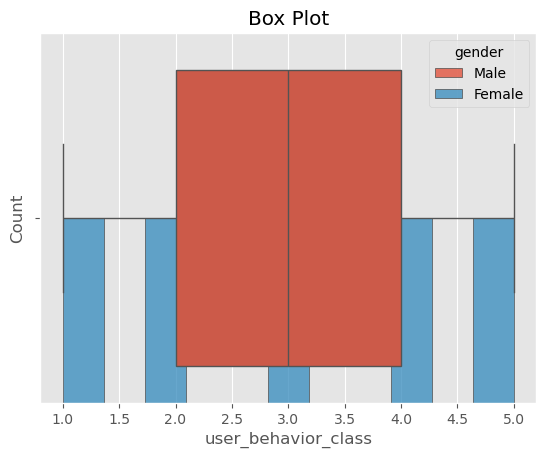

In [22]:
# The Outliers can be identifyed from a Boxplot
sns.boxplot(x=users['user_behavior_class'])
plt.title('Box Plot')
plt.show()

There are no outliers visible at first glance.

### - Analysis for variable "device_model":

In [23]:
# The variable behave as:
sns.histplot(users, x='device_model', 
             hue='user_behavior_class', 
             multiple="dodge", 
             palette="pastel",
             shrink=.75)
plt.title("Users of different device models")

Text(0.5, 1.0, 'Users of different device models')

In [24]:
users['device_model'].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [25]:
# Since both variables are categorical in nature, the chi-squared test of independence will be used. 

# A contingency table is created.
devices = pd.crosstab(users.device_model, users.user_behavior_class)

# Then, I'll apply the non-parametric test for comparaison (Chi-squared):
stat, p, dof, expected = chi2_contingency(devices)
print("\nChi 2 squared Test:")
print(f"X2-statistic: {stat}, P-value: {p}")


Chi 2 squared Test:
X2-statistic: 9.323292999855825, P-value: 0.8995047686361158


The P-value calculated 0.8995 is higher than 0.05, then there is no variability explained by the type of device used. Therefore, This variable should not be included in the model.

### - Analysis for variable "gender":

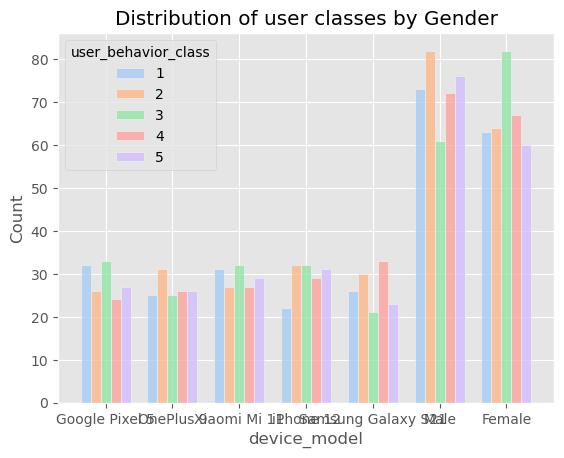

In [26]:
# The 'gender' variable behave as:
sns.histplot(x="gender", 
             hue="user_behavior_class", 
             multiple="dodge", 
             data=users, 
             shrink= 0.75, 
             palette="pastel")
plt.title("Distribution of user classes by Gender")
plt.show()

In [27]:
# Since both variables are categorical in nature, the chi-squared test of independence will be used. 

# A contingency table is created.
genders = pd.crosstab(users.gender, users.user_behavior_class)

# Then, I'll apply the non-parametric test for comparaison (Chi-squared):
stat, p, dof, expected = chi2_contingency(genders)
print("\nChi 2 squared Test:")
print(f"X2-statistic: {stat}, P-value: {p}")


Chi 2 squared Test:
X2-statistic: 6.99178419475091, P-value: 0.13632303058200942


The P-value calculated 0.1363230 is higher than 0.05, then there is no relationship between gender and user classes. That means, variability in user behaviour explained by the gender of the user. Therefore, This variable should not be included in the model.

### - Analysis for variable "operating_system":

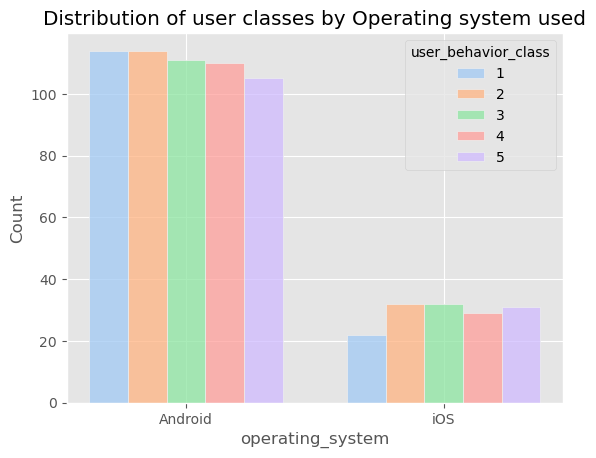

In [28]:
# The 'operating_system' variable behave as:
sns.histplot(x="operating_system", 
             hue="user_behavior_class", 
             multiple="dodge", 
             data=users, 
             shrink= 0.75, 
             palette="pastel")
plt.title("Distribution of user classes by Operating system used")
plt.show()

In [29]:
# Since both variables are categorical in nature, the chi-squared test of independence will be used. 

# A contingency table is created.
operating_system = pd.crosstab(users.operating_system, users.user_behavior_class)

# Then, I'll apply the non-parametric test for comparaison (Chi-squared):
stat, p, dof, expected = chi2_contingency(operating_system)
print("\nChi 2 squared Test:")
print(f"X2-statistic: {stat}, P-value: {p}")


Chi 2 squared Test:
X2-statistic: 2.4139480808456293, P-value: 0.6601080959701755


The P-value calculated 0.660108 is higher than 0.05, then there is no relationship between operating system used and user classes. That means, variability in user behaviour explained by the operating system of the user's phone. Therefore, This variable should not be included in the model.

### - Analysis for variable "age":

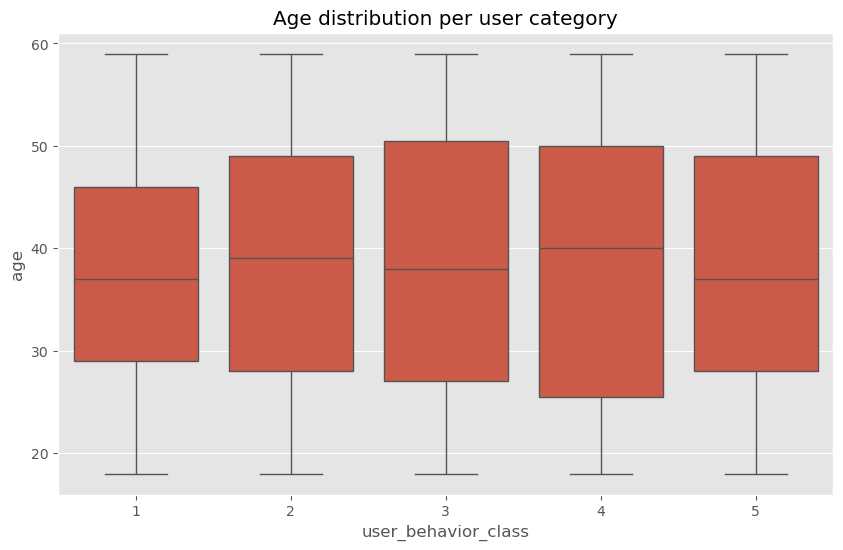

In [30]:
# visualizing the age distribution per user category
plt.figure(figsize=(10,6))
sns.boxplot(x='user_behavior_class', y='age', data=users)
plt.title('Age distribution per user category')
plt.show()

In [31]:
# The firts step is spliting the categories in the column as follows:
groups_age = [group["age"].values for name, group in users.groupby("user_behavior_class")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
print("Class of user 1:", shapiro(groups_age[0]))
print("Class of user 2:", shapiro(groups_age[1]))
print("Class of user 3:", shapiro(groups_age[2]))
print("Class of user 4:", shapiro(groups_age[3]))
print("Class of user 5:", shapiro(groups_age[4]))

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_age)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f'There is not homogeinity of variance between group of devices because {p} is higher than 0.05')

Normality Test (Shapiro-Wilk):
Class of user 1: ShapiroResult(statistic=0.9601140392950264, pvalue=0.0005320171751616268)
Class of user 2: ShapiroResult(statistic=0.9554465055701064, pvalue=0.00011988118395769519)
Class of user 3: ShapiroResult(statistic=0.9305610052606342, pvalue=1.8080608319968525e-06)
Class of user 4: ShapiroResult(statistic=0.9310666622520742, pvalue=2.629407735150447e-06)
Class of user 5: ShapiroResult(statistic=0.9496488878272851, pvalue=7.278021089130132e-05)

Levene’s Test for Equal Variance:
Statistic: 1.827599921542959, P-value: 0.12168352328390827
There is not homogeinity of variance between group of devices because 0.12168352328390827 is higher than 0.05


In [32]:
# The assumption of normally distributed data is proven, but there is no evidence of homoscedasticity. 
# Then, I will apply the non-parametric Kruskal-Wallis test to assess differences between groups:
stat, p = kruskal(*groups_age)
print("Kruskal-Wallis H Test:")
print(f"H-statistic: {stat}, P-value: {p}")

Kruskal-Wallis H Test:
H-statistic: 0.22854571186024578, P-value: 0.9939475792329974


The P-value calculated 0.9939 is far higher than 0.05; then, any observed differences in age between user classes groups are likely due to random variation rather than a true relationship. Therefore, This variable should not be included in the model.

### - Analysis for variable "app_usage_time_(min/day)":

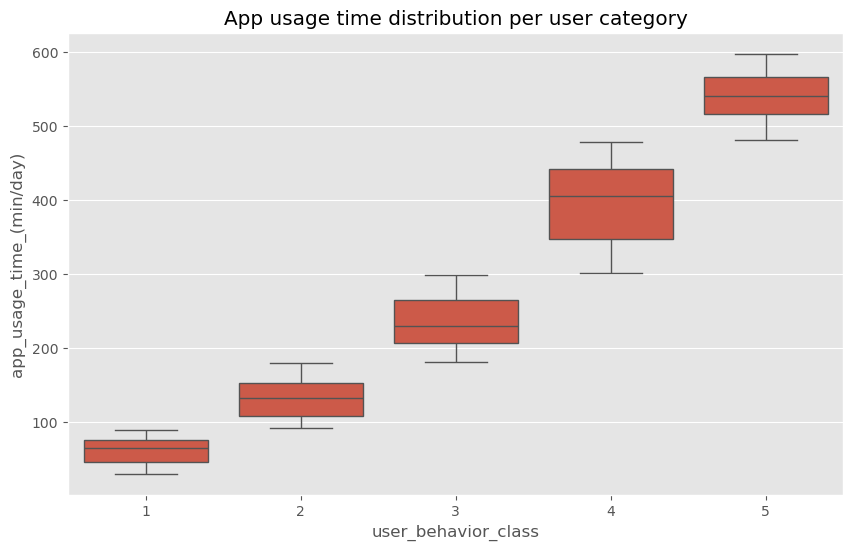

In [33]:
# visualizing the app usage time distribution per user category
plt.figure(figsize=(10,6))
sns.boxplot(x='user_behavior_class', y='app_usage_time_(min/day)', data=users)
plt.title('App usage time distribution per user category')
plt.show()

In [34]:
# The firts step is spliting the categories in the column as follows:
groups_app_usage = [group["app_usage_time_(min/day)"].values for name, group in users.groupby("user_behavior_class")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
print("Class of user 1:", shapiro(groups_app_usage[0]))
print("Class of user 2:", shapiro(groups_app_usage[1]))
print("Class of user 3:", shapiro(groups_app_usage[2]))
print("Class of user 4:", shapiro(groups_app_usage[3]))
print("Class of user 5:", shapiro(groups_app_usage[4]))

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_app_usage)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f'There is homogeinity of variance between group of user classes because {p} is smaller than 0.05')

Normality Test (Shapiro-Wilk):
Class of user 1: ShapiroResult(statistic=0.9472808488530936, pvalue=4.7665563609424605e-05)
Class of user 2: ShapiroResult(statistic=0.9542199604472779, pvalue=9.406855993366491e-05)
Class of user 3: ShapiroResult(statistic=0.9471580689500327, pvalue=2.9769996337401914e-05)
Class of user 4: ShapiroResult(statistic=0.9402060510027039, pvalue=1.1528660275613888e-05)
Class of user 5: ShapiroResult(statistic=0.9644347136612353, pvalue=0.0012873018839486298)

Levene’s Test for Equal Variance:
Statistic: 46.95485178064219, P-value: 5.941588330548182e-35
There is homogeinity of variance between group of user classes because 5.941588330548182e-35 is smaller than 0.05


In [35]:
# The variable 'app_usage_time_(min/day)' follows a normal distribution, and evidence supports homoscedasticity between user groups. 
# Then, I will apply the parametric One-way ANOVA test to assess differences between groups:
stat, p = f_oneway(*groups_app_usage)
print("One-way ANOVA Test:")
print(f"F-statistic: {stat}, P-value: {p}")

One-way ANOVA Test:
F-statistic: 4555.299163870112, P-value: 0.0


As observed in the image above, some classes have significantly higher usage times than others. The extremely small p-value suggests that the observed differences in group means are almost certainly not due to random chance. Therefore, this variable clearly differentiates user behavior.

### - Analysis for variable "screen_on_time_(min/day)":

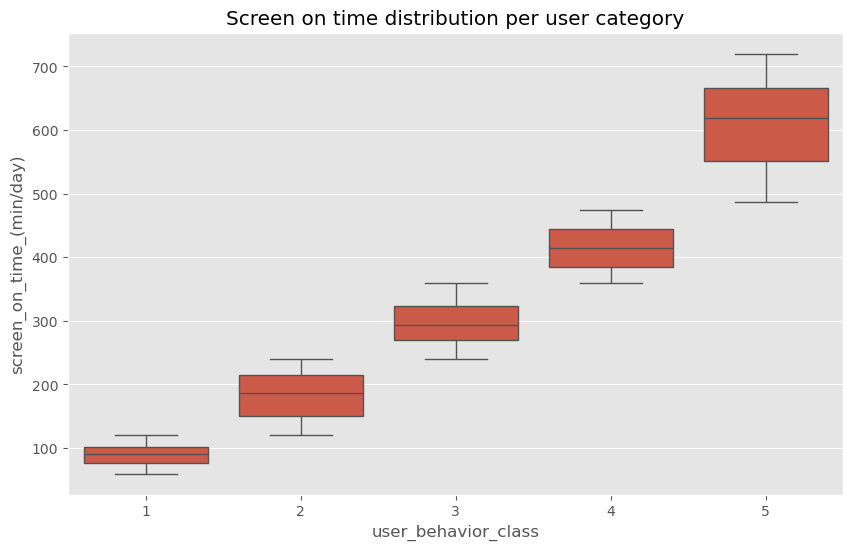

In [36]:
# visualizing the screen exposition time per user category
plt.figure(figsize=(10,6))
sns.boxplot(x='user_behavior_class', y='screen_on_time_(min/day)', data=users)
plt.title('Screen on time distribution per user category')
plt.show()

In [37]:
# The firts step is spliting the categories in the column as follows:
groups_screen = [group["screen_on_time_(min/day)"].values for name, group in users.groupby("user_behavior_class")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
print("Class of user 1:", shapiro(groups_screen[0]))
print("Class of user 2:", shapiro(groups_screen[1]))
print("Class of user 3:", shapiro(groups_screen[2]))
print("Class of user 4:", shapiro(groups_screen[3]))
print("Class of user 5:", shapiro(groups_screen[4]))

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_screen)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f'There is homogeinity of variance between group of user classes because {p} is smaller than 0.05')

Normality Test (Shapiro-Wilk):
Class of user 1: ShapiroResult(statistic=0.951463560727136, pvalue=0.00010130594441840498)
Class of user 2: ShapiroResult(statistic=0.9481646124406252, pvalue=2.9639694764748247e-05)
Class of user 3: ShapiroResult(statistic=0.957196183711702, pvalue=0.00020142913868483834)
Class of user 4: ShapiroResult(statistic=0.9392486001939377, pvalue=9.822379138439395e-06)
Class of user 5: ShapiroResult(statistic=0.9465914588564697, pvalue=4.221232855650459e-05)

Levene’s Test for Equal Variance:
Statistic: 73.65950492550043, P-value: 4.793197178324948e-52
There is homogeinity of variance between group of user classes because 4.793197178324948e-52 is smaller than 0.05


In [38]:
# The variable 'screen_on_time_(min/day)' follows a normal distribution, and evidence supports homoscedasticity between user groups. 
# Then, I will apply the parametric One-way ANOVA test to assess differences between groups:
stat, p = f_oneway(*groups_screen)
print("One-way ANOVA Test:")
print(f"F-statistic: {stat}, P-value: {p}")

One-way ANOVA Test:
F-statistic: 3272.298927152075, P-value: 0.0


Based on the image above, certain classes exhibit notably higher usage times compared to others. The very small p-value indicates that the differences in group means are highly unlikely to be due to random variation. As a result, this variable effectively distinguishes user behavior.

### - Analysis for variable "battery_drain_(mah/day)":

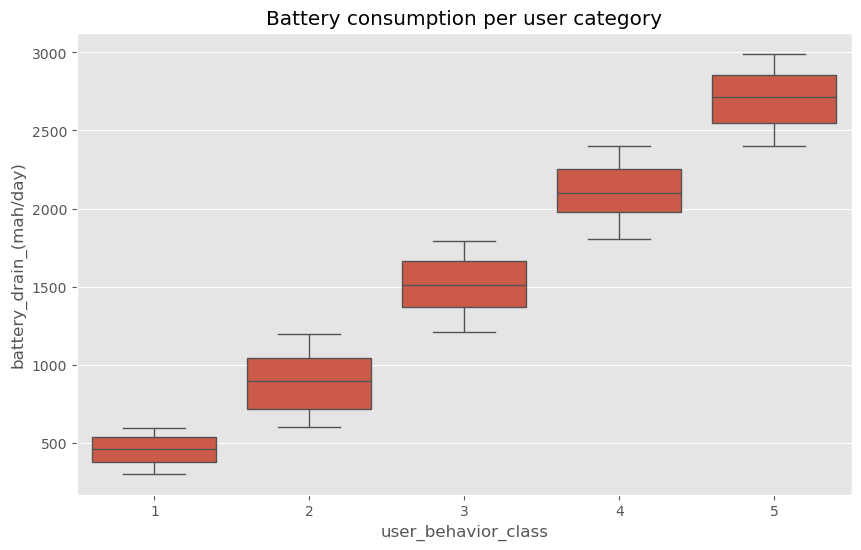

In [39]:
# visualizing the battery consumption per user category
plt.figure(figsize=(10,6))
sns.boxplot(x='user_behavior_class', y='battery_drain_(mah/day)', data=users)
plt.title('Battery consumption per user category')
plt.show()

In [40]:
# The firts step is spliting the categories in the column as follows:
groups_battery = [group["battery_drain_(mah/day)"].values for name, group in users.groupby("user_behavior_class")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
print("Class of user 1:", shapiro(groups_battery[0]))
print("Class of user 2:", shapiro(groups_battery[1]))
print("Class of user 3:", shapiro(groups_battery[2]))
print("Class of user 4:", shapiro(groups_battery[3]))
print("Class of user 5:", shapiro(groups_battery[4]))

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_battery)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f'There is homogeinity of variance between group of user classes because {p} is smaller than 0.05')

Normality Test (Shapiro-Wilk):
Class of user 1: ShapiroResult(statistic=0.9447238277266147, pvalue=3.0488139321611214e-05)
Class of user 2: ShapiroResult(statistic=0.9363005244503125, pvalue=3.693053200424206e-06)
Class of user 3: ShapiroResult(statistic=0.9511359471028092, pvalue=6.211014406710434e-05)
Class of user 4: ShapiroResult(statistic=0.9615008799050774, pvalue=0.0005999739100527178)
Class of user 5: ShapiroResult(statistic=0.9366416255692789, pvalue=7.915946323253332e-06)

Levene’s Test for Equal Variance:
Statistic: 24.90278823414599, P-value: 2.7223344149503504e-19
There is homogeinity of variance between group of user classes because 2.7223344149503504e-19 is smaller than 0.05


In [41]:
# The variable 'battery_drain_(mah/day)' follows a normal distribution, and evidence supports homoscedasticity between user groups. 
# Then, I will apply the parametric One-way ANOVA test to assess differences between groups:
stat, p = f_oneway(*groups_battery)
print("One-way ANOVA Test:")
print(f"F-statistic: {stat}, P-value: {p}")

One-way ANOVA Test:
F-statistic: 4282.373777407797, P-value: 0.0


The P-value calculated is smaller than 1e300. Hence, it's smaller than 0.05, then there is variability explained in user classes by the battery consumption patterns. Therefore, This variable should be included in the model.

### - Analysis for variable "number_of_apps_installed":

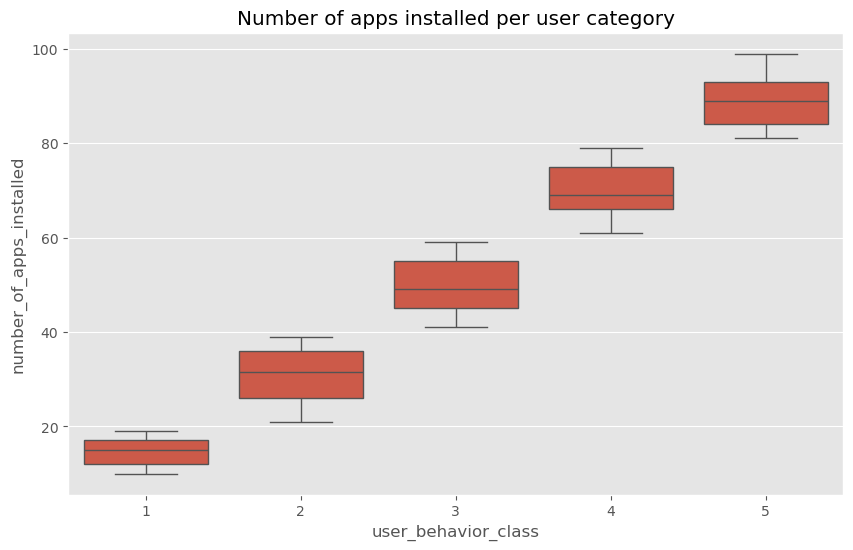

In [42]:
# visualizing the number of apps installed per user category
plt.figure(figsize=(10,6))
sns.boxplot(x='user_behavior_class', y='number_of_apps_installed', data=users)
plt.title('Number of apps installed per user category')
plt.show()

In [43]:
# The firts step is spliting the categories in the column as follows:
groups_app_number = [group["number_of_apps_installed"].values for name, group in users.groupby("user_behavior_class")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
print("Class of user 1:", shapiro(groups_app_number[0]))
print("Class of user 2:", shapiro(groups_app_number[1]))
print("Class of user 3:", shapiro(groups_app_number[2]))
print("Class of user 4:", shapiro(groups_app_number[3]))
print("Class of user 5:", shapiro(groups_app_number[4]))

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_app_number)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f'There is homogeinity of variance between group of user classes because {p} is smaller than 0.05')

Normality Test (Shapiro-Wilk):
Class of user 1: ShapiroResult(statistic=0.9332518210890568, pvalue=4.617839773860109e-06)
Class of user 2: ShapiroResult(statistic=0.9319849467838194, pvalue=1.8226095923943423e-06)
Class of user 3: ShapiroResult(statistic=0.9407247843881843, pvalue=9.581435216512816e-06)
Class of user 4: ShapiroResult(statistic=0.9493748069724248, pvalue=5.7354905500010334e-05)
Class of user 5: ShapiroResult(statistic=0.9423914925049903, pvalue=2.04609153738246e-05)

Levene’s Test for Equal Variance:
Statistic: 18.792602441489556, P-value: 1.1061933185363703e-14
There is homogeinity of variance between group of user classes because 1.1061933185363703e-14 is smaller than 0.05


In [44]:
# The variable 'number_of_apps_installed' follows a normal distribution, and evidence supports homoscedasticity between user groups. 
# Then, I will apply the parametric One-way ANOVA test to assess differences between groups:
stat, p = f_oneway(*groups_app_number)
print("One-way ANOVA Test:")
print(f"F-statistic: {stat}, P-value: {p}")

One-way ANOVA Test:
F-statistic: 4677.960387921165, P-value: 0.0


The P-value calculated is smaller than 0.05, then there is variability explained by the number of apps installed by the different users. Therefore, This variable should be included in the model.

### - Analysis for variable "data_usage_(mb/day)":

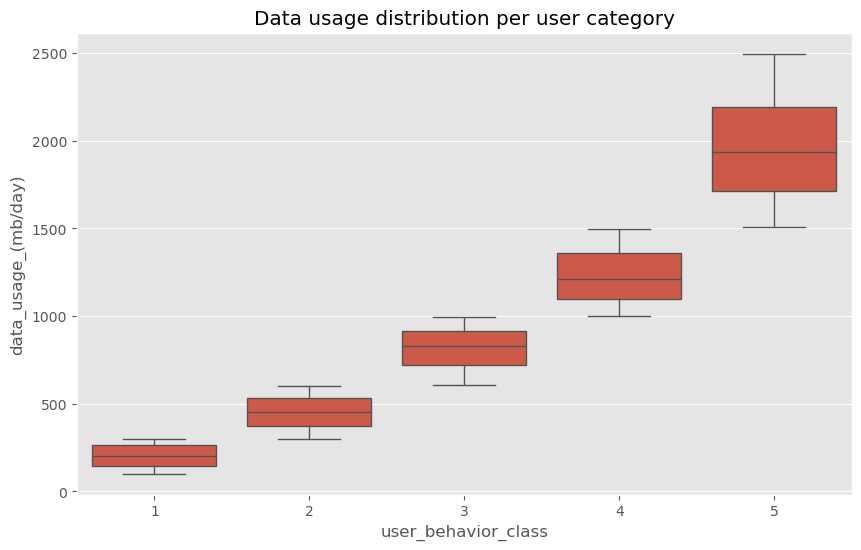

In [45]:
# visualizing the data usage distribution per user category
plt.figure(figsize=(10,6))
sns.boxplot(x='user_behavior_class', y='data_usage_(mb/day)', data=users)
plt.title('Data usage distribution per user category')
plt.show()

In [46]:
# The firts step is spliting the categories in the column as follows:
groups_data = [group["data_usage_(mb/day)"].values for name, group in users.groupby("user_behavior_class")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
print("Class of user 1:", shapiro(groups_data[0]))
print("Class of user 2:", shapiro(groups_data[1]))
print("Class of user 3:", shapiro(groups_data[2]))
print("Class of user 4:", shapiro(groups_data[3]))
print("Class of user 5:", shapiro(groups_data[4]))

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_data)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f'There is homogeinity of variance between group of user classes because {p} is smaller than 0.05')

Normality Test (Shapiro-Wilk):
Class of user 1: ShapiroResult(statistic=0.9321468144603032, pvalue=3.886051728334073e-06)
Class of user 2: ShapiroResult(statistic=0.9433880273766511, pvalue=1.2477107106125782e-05)
Class of user 3: ShapiroResult(statistic=0.9408798860030743, pvalue=9.839461806700609e-06)
Class of user 4: ShapiroResult(statistic=0.9322458680280987, pvalue=3.1624339907178564e-06)
Class of user 5: ShapiroResult(statistic=0.9415026813154603, pvalue=1.7613430145494607e-05)

Levene’s Test for Equal Variance:
Statistic: 122.52078966175151, P-value: 4.192661769734315e-79
There is homogeinity of variance between group of user classes because 4.192661769734315e-79 is smaller than 0.05


In [47]:
# The variable 'data_usage_(mb/day)' follows a normal distribution, and evidence supports homoscedasticity between user groups. 
# Then, I will apply the parametric One-way ANOVA test to assess differences between groups:
stat, p = f_oneway(*groups_data)
print("One-way ANOVA Test:")
print(f"F-statistic: {stat}, P-value: {p}")

One-way ANOVA Test:
F-statistic: 2526.899738782396, P-value: 0.0


The calculated p-value is less than 0.05, indicating that the amount of data used by different users explains some of the variability. Consequently, this variable should be included in the model.

### - Analysis of information explaind by categorical variables:

To determine the key variables, I use the following function: 

In [48]:
def mutual_info_categorical(series):
    return mutual_info_score(series, users.user_behavior_class)

Then, applying the function above I got: 

In [49]:
mi = users[categorical].apply(mutual_info_categorical)
mi.sort_values(ascending=False)

user_id                1.609041
user_behavior_class    1.609041
age                    0.118253
device_model           0.006736
gender                 0.005002
operating_system       0.001797
dtype: float64

From this, it becomes clear that these variables are not significant for our future elaborated model.

### - Analysis of correlated variables:

In [50]:
users[numerical].corrwith(users.user_behavior_class)

app_usage_time_(min/day)    0.970498
screen_on_time_(min/day)    0.964581
battery_drain_(mah/day)     0.978587
number_of_apps_installed    0.981255
data_usage_(mb/day)         0.946734
dtype: float64

From the results above, it is evident that all numerical variables in our dataset are positively correlated with the target variable (user_behavior_class). This indicates that higher user categories require more resources from their phones.

Based on the analysis developed, the variables useful for our purpose of classifying users are:

In [51]:
# The significant variables identifyed were:
significant_var = ['app_usage_time_(min/day)', 'battery_drain_(mah/day)', 'number_of_apps_installed','data_usage_(mb/day)', 
                    'screen_on_time_(min/day)', 'user_behavior_class']

# The not significant variables identifyed were:
not_significant_var = ['device_model', 'gender', 'operating_system', 'age']

## Step 4: Model identification
The cleaned dataset is filtered to include the significant variables identified above.

In [52]:
users_cleaned = users[significant_var]
users_cleaned.reset_index
users_cleaned.head()

,app_usage_time_(min/day),battery_drain_(mah/day),number_of_apps_installed,data_usage_(mb/day),screen_on_time_(min/day),user_behavior_class
0,393,1872,67,1122,384.0,4
1,268,1331,42,944,282.0,3
2,154,761,32,322,240.0,2
3,239,1676,56,871,288.0,3
4,187,1367,58,988,258.0,3


In [53]:
# The data is transformed to dictionaries as this example:
users_dict = users.to_dict(orient='records')
users_dict = users_dict[3]
users_dict

{'user_id': 4,
 'device_model': 'Google Pixel 5',
 'operating_system': 'Android',
 'app_usage_time_(min/day)': 239,
 'screen_on_time_(hours/day)': 4.8,
 'battery_drain_(mah/day)': 1676,
 'number_of_apps_installed': 56,
 'data_usage_(mb/day)': 871,
 'age': 20,
 'gender': 'Male',
 'user_behavior_class': 3,
 'screen_on_time_(min/day)': 288.0}

Working dataset is prepared and splitted as follows:

In [54]:
# Preparation dataset
X = users_cleaned.drop('user_behavior_class', axis=1)
y = users_cleaned['user_behavior_class']

# Convert target to categorical codes so scikit-learn classification models can work properly
y = y.astype('category').cat.codes

# Turning the dataframes into dictionaries:
X_dic = X.to_dict(orient='records')

In [55]:
# Instanciating the vectorizer for the dictionary:
dv = DictVectorizer(sparse=False)

# Applying the vectorizer:
X_encoded = dv.fit_transform(X_dic)

In [56]:
# The vectorized rows are transformed to the form of:
print(f'The column names are: {dv.get_feature_names_out()}')
print('\n The first element of the transformed dataset is: ')
X_encoded[0]

The column names are: ['app_usage_time_(min/day)' 'battery_drain_(mah/day)'
 'data_usage_(mb/day)' 'number_of_apps_installed'
 'screen_on_time_(min/day)']

 The first element of the transformed dataset is: 


array([ 393., 1872., 1122.,   67.,  384.])

Then, dataset is splitted as follows: 60% for training, 20% for validation, and 20% for testing.

In [57]:
# We first split for testing
X_full_train, X_test, y_full_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=2)

# Then we split again for validation
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=2)

# The lenght of the datasets can be validated as:
print(f'The number of registries in the train dataset is {len(X_train)}, in the validation dataset is {len(X_val)}, and in the test dataset is {len(X_test)}.')

The number of registries in the train dataset is 420, in the validation dataset is 140, and in the test dataset is 140.


### - Let's try some models:

__1. Decision Tree Model:__

In [58]:
# The model is trained as  follows:
decision_tree = DecisionTreeClassifier(max_depth=2)

# The trained model is used to predict the values in the test dataset:
decision_tree.fit(X_train, y_train)
y_pred_val = decision_tree.predict(X_val)

# The indicator chosen for assessing the validity of the model is Accuracy:
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_val))


Decision Tree Metrics:
Accuracy: 0.5785714285714286


In [59]:
# The parameters of the trained model are:
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [60]:
# Tunning the hyperparameters is crucial. In this case, I'll define the followings:
param_grid = {    
    'max_depth': [None, 3, 5, 10, 20, 30],              # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],                    # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],                      # Minimum samples in a leaf
    'max_features': [None, 'sqrt', 'log2']              # Features to consider at each split
}

In [61]:
# I'll use GridSearchCV for exhaustive tuning and preventing overfitting.
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=2, n_jobs=-1, 
                           error_score='raise')

grid_search.fit(X_train, y_train)

print("Best parameters for my Decision Tree model are:", grid_search.best_params_)
best_dt_model = grid_search.best_estimator_

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters for my Decision Tree model are: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [62]:
# Generate predictions with the best model 
y_pred_val_opt = best_dt_model.predict(X_val)

# Create a confusion matrix 
cm_dt = confusion_matrix(y_val, y_pred_val_opt)

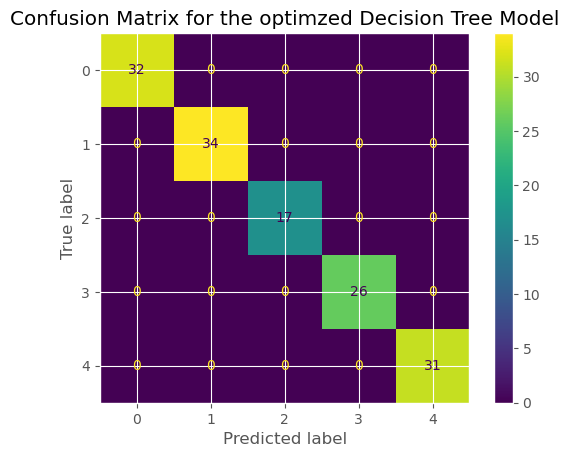

In [63]:
# Display the confusion matrix created
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=best_dt_model.classes_).plot()
plt.title('Confusion Matrix for the optimzed Decision Tree Model')
plt.show()

In [64]:
# The classification_report provides a comprehensive overview of classification performance across 
# multiple metrics (precision, recall, f1-score) for each class in the model
dt_report = classification_report(y_val, y_pred_val_opt, target_names=['1', '2', '3', '4', '5'])
print(dt_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        31

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



__2. Random Forest Model:__

In [65]:
# The model is trained as follows:
random_forest = RandomForestClassifier(max_depth=2, random_state=2)

# The trained model is used to predict the values in the test dataset:
random_forest.fit(X_train, y_train)
y_pred_val = random_forest.predict(X_val)

# The indicator chosen for assessing the validity of the model is Accuracy:
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_val))

Random Forest Metrics:
Accuracy: 1.0


In [66]:
# The parameters of the trained model are:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [67]:
# Tunning the hyperparameters is crucial. In this case, I'll define the followings:
param_grid = {
    'n_estimators': [20, 50, 100, 200, 300],    # Number of trees
    'max_depth': [None, 10, 20, 30],            # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],            # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],              # Minimum samples in a leaf
    'max_features': [1.0, 'sqrt', 'log2'],      # Features to consider at each split
    'bootstrap': [True, False],                 # Whether to use bootstrap samples
}

In [68]:
# I'll use GridSearchCV for exhaustive tuning and preventing overfitting.
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=2, n_jobs=-1, 
                           error_score='raise')
grid_search.fit(X_train, y_train)

print("Best parameters for our Random forest model are:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
Best parameters for our Random forest model are: {'bootstrap': True, 'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [69]:
# Generate predictions with the best model 
y_pred_val_opt = best_rf_model.predict(X_val)

# Create a confusion matrix 
cm_rf = confusion_matrix(y_val, y_pred_val_opt)

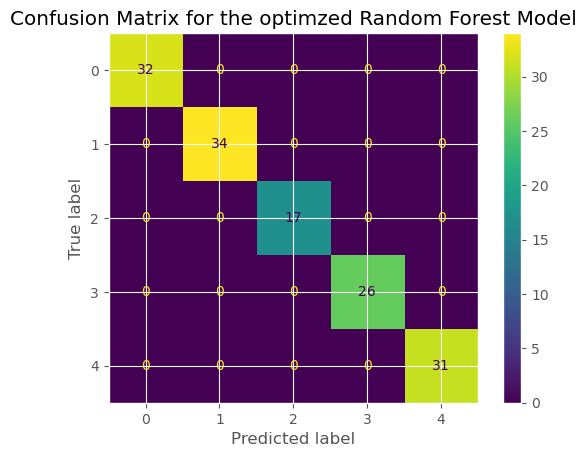

In [70]:
# Display the confusion matrix created
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf_model.classes_).plot()
plt.title('Confusion Matrix for the optimzed Random Forest Model')
plt.show()

In [71]:
# The classification_report provides a comprehensive overview of classification performance across 
# multiple metrics (precision, recall, f1-score) for each class in the model
rf_report = classification_report(y_val, y_pred_val_opt, target_names=['1', '2', '3', '4', '5'])
print(rf_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        31

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



__3. Gradient Boosted Trees (GBT) Model:__

In [72]:
# The model is trained as follows:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=2)

# The trained model is used to predict the values in the test dataset:
gbt.fit(X_train, y_train)
y_pred_val = gbt.predict(X_val)

# The indicator chosen for assessing the validity of the model is Accuracy:
print("Gradient Boosted Trees (GBT) Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_val))

Gradient Boosted Trees (GBT) Metrics:
Accuracy: 1.0


In [73]:
gbt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 2,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [74]:
# Tunning the hyperparameters is crucial. In this case, I'll define the followings:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [75]:
# I'll use GridSearchCV for exhaustive tuning and preventing overfitting.
grid_search = GridSearchCV(estimator=gbt, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=2, n_jobs=-1, 
                           error_score='raise')
grid_search.fit(X_train, y_train)

print("Best parameters for our Random forest model are:", grid_search.best_params_)
best_gbt_model = grid_search.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for our Random forest model are: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [76]:
# Generate predictions with the best model 
y_pred_val_opt = best_gbt_model.predict(X_val)

# Create a confusion matrix 
cm_gbt = confusion_matrix(y_val, y_pred_val_opt)

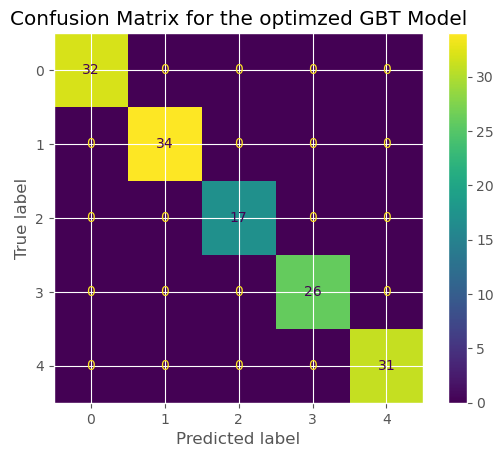

In [77]:
# Display the confusion matrix created
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gbt, display_labels=best_gbt_model.classes_).plot()
plt.title('Confusion Matrix for the optimzed GBT Model')
plt.show()

In [78]:
# The classification_report provides a comprehensive overview of classification performance across 
# multiple metrics (precision, recall, f1-score) for each class in the model
gbt_report = classification_report(y_val, y_pred_val_opt, target_names=['1', '2', '3', '4', '5'])
print(gbt_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        31

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



__4. Support Vector Classifier Model:__

SVM relies on distance and kernel computations, that's why SMV is highly sensitive to feature magnitudes.

In [79]:
# Standardize features for this model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)

In [80]:
# The model is trained as follows:
svm_class = SVC(kernel='rbf', gamma='auto', C=1.0, random_state=2)

# The trained model is used to predict the values in the test dataset:
svm_class.fit(X_train_scaled, y_train)
y_pred_val = svm_class.predict(X_val_scaled)

# The indicator chosen for assessing the validity of the model is Accuracy:
print("Support Vector Machine (SVM) Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_val))

Support Vector Machine (SVM) Metrics:
Accuracy: 0.9642857142857143


In [81]:
# The parameters of the SVM are:
svm_class.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 2,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [82]:
# Tunning the hyperparameters is crucial. In this case, I'll define the followings:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [83]:
# I'll use GridSearchCV for exhaustive tuning and preventing overfitting.
grid_search = GridSearchCV(estimator=svm_class, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=2, n_jobs=-1, 
                           error_score='raise')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters for our Support Vector Machime (SVM) model are:", grid_search.best_params_)
best_svm_model = grid_search.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters for our Support Vector Machime (SVM) model are: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [84]:
# Generate predictions with the best model 
y_pred_val_opt = best_svm_model.predict(X_val_scaled)

# Create a confusion matrix 
cm_svm = confusion_matrix(y_val, y_pred_val_opt)

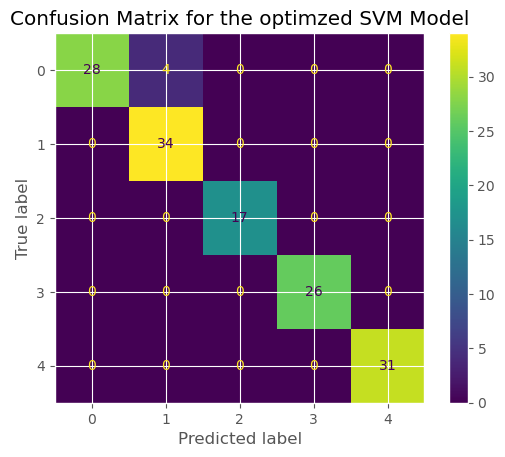

In [85]:
# Display the confusion matrix created
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=best_svm_model.classes_).plot()
plt.title('Confusion Matrix for the optimzed SVM Model')
plt.show()

In [86]:
# The classification_report provides a comprehensive overview of classification performance across 
# multiple metrics (precision, recall, f1-score) for each class in the model
svm_report = classification_report(y_val, y_pred_val_opt, target_names=['1', '2', '3', '4', '5'])
print(svm_report)

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        32
           2       0.89      1.00      0.94        34
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        31

    accuracy                           0.97       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.97      0.97      0.97       140



__To summarize, the chosen models produce the following Accuracy, Precision and Recall scores when applied to the test dataset:__

In [90]:
# The list of models evaluated are:
listed_models = { 
                 "Raw Decision Tree": decision_tree, 
                 "Optimized Decision Tree": best_dt_model, 
                  "Raw Random forest": random_forest,
                  "Optimized Random Forest": best_rf_model,
                  "Raw Gradient Boosted trees": gbt, 
                  "Optimized GBT": best_gbt_model,
                  "Raw SVM Classifier": svm_class, 
                  "Optimized SVM Classifier": best_svm_model,
                }

In [91]:
# The evaluation is performed by: 
result_scores = [] 
for name, model in listed_models.items():
    if 'SVM' in name:
        scaler = StandardScaler()
        X_test_scaled = scaler.fit_transform(X_test)
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    #Then the calculation of metris is:
    accuracy_model = accuracy_score(y_test, y_pred)
    precision_model = precision_score(y_test, y_pred, average='weighted')
    recall_model = recall_score(y_test, y_pred, average='weighted')
    result_scores.append([name, accuracy_model, precision_model, recall_model])

scores_summary = pd.DataFrame(result_scores, columns=['Model', 'Accuracy', 'Precision', 'Recall'])

# The summary of evaluation metrics is:
scores_summary

c:\Users\jober\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall
0,Raw Decision Tree,0.564286,0.348954,0.564286
1,Optimized Decision Tree,0.985714,0.986667,0.985714
2,Raw Random forest,1.000000,1.000000,1.000000
3,Optimized Random Forest,1.000000,1.000000,1.000000
4,Raw Gradient Boosted trees,1.000000,1.000000,1.000000
5,Optimized GBT,1.000000,1.000000,1.000000
6,Raw SVM Classifier,0.992857,0.993214,0.992857
7,Optimized SVM Classifier,0.992857,0.993214,0.992857
